# Set up Enviornment, Load Data and Preferred Visuals 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
# Clean plot representation
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [21]:
df = pd.read_csv('loan.csv', low_memory=False)

## Quick look and orientation

In [49]:
print(f"Loaded {len(df):,} loans")
print(f"Columns: {df.shape[1]}")
average_loan = df['loan_amnt'].mean()
print(f"Average Loan: {average_loan}")
df.head()

Loaded 2,260,668 loans
Columns: 146
Average Loan: 15046.931227849467


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidati

In [25]:
pd.set_option('display.max_columns', None)
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## What would help guide loan approval decisions IF credit score of two applicants are similar or same?
### Hypothesis: Two other data sets would be strongly indicative inlcuding: Debt behavior and Employment stability

The job now is to pick some of the top possible data points that can help complete our picture of debt behvior and employment, then figure out if it is a strong data point, does it have clean or enough data to work with within this dataset as a whole?


In [ ]:
#Possible data points of interest with hypothesis picked 
#accNowDelinq, accOpenPast24Mths, all_util, annual_inc_joint, 
#annualInc, delinq2Yrs, emp_title, empLength, 
#mthsSinceRecentLoanDelinq, percentBcGt75, revolUtil

### Avoiding Data leakage and redundancy 
#### Which variables are seen at the moment of application, and which ones only exist after you've decision was made?



Honing in on #mthsSinceRecentLoanDelinq bc it can be measured, with some longevity, at the time of the loan application 

### Testing which variables are clean enough for me to use in testing two seperate hypothesis about debt behavior and employment history being predictive for loan performance. 

In [37]:
# Variables of interest
debt_behavior_vars = ['accNowDelinq', 'mthsSinceRecentLoanDelinq', 'delinq_2yrs', 
                      'all_util', 'revol_util', 'percent_bc_gt_75']

employment_vars = ['emp_title', 'emp_length', 'annual_inc', 'annual_inc_joint']

# Check completeness and basic stats
#iterate over my choice variables and see percentage of completion
print("=== DEBT BEHAVIOR VARIABLES ===")
for var in debt_behavior_vars:
    if var in df.columns:
        completeness = df[var].notna().sum() / len(df) * 100
        print(f"{var}: {completeness:.1f}% complete")
    else:
        print(f"{var}: NOT FOUND (check spelling)")


#iterate and find the same for employment variables
print("\n=== EMPLOYMENT VARIABLES ===")
for var in employment_vars:
    if var in df.columns:
        completeness = df[var].notna().sum() / len(df) * 100
        print(f"{var}: {completeness:.1f}% complete")
    else:
        print(f"{var}: NOT FOUND (check spelling)")

=== DEBT BEHAVIOR VARIABLES ===
accNowDelinq: NOT FOUND (check spelling)
mthsSinceRecentLoanDelinq: NOT FOUND (check spelling)
delinq_2yrs: 100.0% complete
all_util: 61.7% complete
revol_util: 99.9% complete
percent_bc_gt_75: 96.7% complete

=== EMPLOYMENT VARIABLES ===
emp_title: 92.6% complete
emp_length: 93.5% complete
annual_inc: 100.0% complete
annual_inc_joint: 5.3% complete


## Targeted debt relationship variables of choice, but now to look beyond "completeness" 
Value distribution and pecentage of total data set that is beyond 0 

In [40]:
# Create your target variable first
df['default'] = df['loan_status'].isin(['Charged Off', 'Default']).astype(int)

# Check your debt behavior variable
print("=== DELINQ_2YRS ===")
print(f"Data type: {df['delinq_2yrs'].dtype}")
print(f"Unique values: {df['delinq_2yrs'].nunique()}")
print(f"\nValue distribution:")
print(df['delinq_2yrs'].value_counts().head(10))
print(f"\nSummary stats:")
print(df['delinq_2yrs'].describe())

=== DELINQ_2YRS ===
Data type: float64
Unique values: 37

Value distribution:
delinq_2yrs
0.0    1839108
1.0     281353
2.0      81289
3.0      29542
4.0      13179
5.0       6599
6.0       3717
7.0       2062
8.0       1223
9.0        818
Name: count, dtype: int64

Summary stats:
count    2.260639e+06
mean     3.068792e-01
std      8.672303e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.800000e+01
Name: delinq_2yrs, dtype: float64


In [43]:
# Get value counts with percentages
print("=== DELINQ_2YRS VALUE DISTRIBUTION ===")
value_counts = df['delinq_2yrs'].value_counts()
value_percentages = df['delinq_2yrs'].value_counts(normalize=True) * 100

distribution = pd.DataFrame({
    'Count': value_counts,
    'Percentage': value_percentages
})
print(distribution.head(10))

=== DELINQ_2YRS VALUE DISTRIBUTION ===
               Count  Percentage
delinq_2yrs                     
0.0          1839108   81.353458
1.0           281353   12.445729
2.0            81289    3.595842
3.0            29542    1.306799
4.0            13179    0.582977
5.0             6599    0.291909
6.0             3717    0.164423
7.0             2062    0.091213
8.0             1223    0.054100
9.0              818    0.036184


## ~16% of values here to test with, not the best, but not nothing. Now to see if any predcition power is transfers to defaults 

In [47]:
# key question: Does it PREDICT defaults?
print("\n=== DOES DELINQUENCY HISTORY PREDICT DEFAULTS? ===")
print("Average delinquencies by loan outcome:")
print(df.groupby('default')['delinq_2yrs'].mean())

# More detailed view
print("\nDefault rate by delinquency count:")
delinq_default_rate = df.groupby('delinq_2yrs')['default'].agg(['mean', 'count'])
delinq_default_rate.columns = ['Default Rate', 'Loan Count']
delinq_default_rate['Default Rate'] = delinq_default_rate['Default Rate'] * 100
print(delinq_default_rate.head(10))


=== DOES DELINQUENCY HISTORY PREDICT DEFAULTS? ===
Average delinquencies by loan outcome:
default
0    0.300877
1    0.352728
Name: delinq_2yrs, dtype: float64

Default rate by delinquency count:
             Default Rate  Loan Count
delinq_2yrs                          
0.0             11.277424     1839108
1.0             12.446642      281353
2.0             13.471687       81289
3.0             13.980096       29542
4.0             14.083011       13179
5.0             14.684043        6599
6.0             13.720743        3717
7.0             15.324927        2062
8.0             13.900245        1223
9.0             13.936430         818


## Initial patterns spotted 
I would want to know the total loan amount worth for  the ~34,887 loans that defaulted with 1 incident (12.4% of 281,353) and for the ~10,892 loans that defaulted with 2 incidents (13.4% of 81,289)

- Basically I want to start estimating the value of more heavily weighting this vairaible as a decision making tool in conjunction with other variables such as credit score.

## A deeper question for another CRSP-DM cycle...Why does the percentage of default actually decrease at 8 and 9 incidents (perhaps practiced with managing debt?) 

## Would DTI be a better indicator?


## Make a df with just 1 Delinq. indicator

In [106]:
defaulted_data = df[(df['delinq_2yrs']==1) & (df['default']==1)]
#print(defaulted_data.head(10))

In [109]:
defaulted_1_delinq = df[(df['delinq_2yrs']==1) & (df['default']==1)]
total_amount_1 = defaulted_1_delinq['loan_amnt'].sum()
count_1 = len(defaulted_1_delinq)

print(f"Defaulted loans with 1 delinquency:")
print(f"  Count: {count_1:,}")
print(f"  Total loan amount: ${total_amount_1:,.2f}")
print(f"  Average loan size: ${total_amount_1/count_1:,.2f}")

# Loans with 2 delinquencies that defaulted
defaulted_2_delinq = df[(df['delinq_2yrs']==2) & (df['default']==1)]
total_amount_2 = defaulted_2_delinq['loan_amnt'].sum()
count_2 = len(defaulted_2_delinq)

print(f"\nDefaulted loans with 2 delinquencies:")
print(f"  Count: {count_2:,}")
print(f"  Total loan amount: ${total_amount_2:,.2f}")
print(f"  Average loan size: ${total_amount_2/count_2:,.2f}")

# Loans with 3 delinquencies that defaulted
defaulted_3_delinq = df[(df['delinq_2yrs']==3) & (df['default']==1)]
total_amount_3 = defaulted_3_delinq['loan_amnt'].sum()
count_3 = len(defaulted_3_delinq)

print(f"\nDefaulted loans with 3 delinquencies:")
print(f"  Count: {count_3:,}")
print(f"  Total loan amount: ${total_amount_3:,.2f}")
print(f"  Average loan size: ${total_amount_3/count_3:,.2f}")

Defaulted loans with 1 delinquency:
  Count: 35,019
  Total loan amount: $560,504,850.00
  Average loan size: $16,005.74

Defaulted loans with 2 delinquencies:
  Count: 10,951
  Total loan amount: $176,481,975.00
  Average loan size: $16,115.60

Defaulted loans with 3 delinquencies:
  Count: 4,130
  Total loan amount: $65,870,625.00
  Average loan size: $15,949.30


## Estimating lost interest 

In [70]:
print("=== CHECKING DATA FORMATS ===")
print(f"Interest rate column:")
print(df['int_rate'].head())
print(f"Data type: {df['int_rate'].dtype}")

print(f"\nTerm column:")
print(df['term'].head())
print(f"Data type: {df['term'].dtype}")

=== CHECKING DATA FORMATS ===
Interest rate column:
0    13.56
1    18.94
2    17.97
3    18.94
4    16.14
Name: int_rate, dtype: float64
Data type: float64

Term column:
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
Data type: object


## Converting Term to int and calculating simple estimates for lost interest

In [132]:
# Clean the term column (extract just the number)
df['term_months'] = df['term'].str.extract('(\d+)').astype(int)

# Convert interest rate from percentage to decimal
df['int_rate_decimal'] = df['int_rate'] / 100

# Calculate total interest that WOULD have been earned if loan paid in full
# Simple interest formula: Principal × Rate × Time (in years)
df['total_interest'] = df['loan_amnt'] * df['int_rate_decimal'] * (df['term_months'] / 12)

# Now calculate lost interest for your defaulted loans
print("=== LOST INTEREST CALCULATION ===")

# 1 delinquency defaults
defaulted_1_delinq = df[(df['delinq_2yrs']==1) & (df['default']==1)]
lost_principal_1 = defaulted_1_delinq['loan_amnt'].sum()
lost_interest_1 = defaulted_1_delinq['total_interest'].sum()
total_loss_1 = lost_principal_1 + lost_interest_1

print(f"Loans with 1 delinquency that defaulted:")
print(f"  Count: {len(defaulted_1_delinq):,}")
print(f"  Lost Principal: ${lost_principal_1:,.2f}")
print(f"  Lost Interest: ${lost_interest_1:,.2f}")
print(f"  Total Loss: ${total_loss_1:,.2f}")

# 2 delinquency defaults
defaulted_2_delinq = df[(df['delinq_2yrs']==2) & (df['default']==1)]
lost_principal_2 = defaulted_2_delinq['loan_amnt'].sum()
lost_interest_2 = defaulted_2_delinq['total_interest'].sum()
total_loss_2 = lost_principal_2 + lost_interest_2

print(f"\nLoans with 2 delinquencies that defaulted:")
print(f"  Count: {len(defaulted_2_delinq):,}")
print(f"  Lost Principal: ${lost_principal_2:,.2f}")
print(f"  Lost Interest: ${lost_interest_2:,.2f}")
print(f"  Total Loss: ${total_loss_2:,.2f}")

!jupyter nbconvert --to script your_notebook_name.ipynb
print(f"\nLoans with 3 delinquencies that defaulted:")
print(f"  Count: {len(defaulted_3_delinq):,}")
print(f"  Lost Principal: ${lost_principal_3:,.2f}")
print(f"  Lost Interest: ${lost_interest_3:,.2f}")
print(f"  Total Loss: ${total_loss_3:,.2f}")

print(f"\n=== COMBINED IMPACT ===")
print(f"Total losses (1-2 delinquencies): ${total_loss_1 + total_loss_2:,.2f}")

=== LOST INTEREST CALCULATION ===
Loans with 1 delinquency that defaulted:
  Count: 35,019
  Lost Principal: $560,504,850.00
  Lost Interest: $378,846,157.70
  Total Loss: $939,351,007.70

Loans with 2 delinquencies that defaulted:
  Count: 10,951
  Lost Principal: $176,481,975.00
  Lost Interest: $119,644,938.76
  Total Loss: $296,126,913.76

Loans with 3 delinquencies that defaulted:
  Count: 4,130
  Lost Principal: $65,870,625.00
  Lost Interest: $43,756,399.60
  Total Loss: $109,627,024.60

=== COMBINED IMPACT ===
Total losses (1-2 delinquencies): $1,235,477,921.46


## Hypothesis:
Borrowers with prior delinquencies are higher risk for default.

### Analyzed so far:

- Dataset: 2.26M loans from Lending Club (2007-2018)
- Key Variable: delinq_2yrs (number of delinquencies in past 2 years)
- Completeness: 100% (robust data)

### Key Findings:

- Baseline default rate: 11.3% (0 delinquencies)
- 1 delinquency default rate: 12.4% (+1.1 percentage points)
- 2 delinquencies default rate: 13.5% (+2.2 percentage points)

### Business Impact - The Money Shot:

- Loans with 1 delinquency that defaulted: 35,019 loans = 939M total loss -- 561M principal + 379M interest
- 'Loans with 2 delinquencies that defaulted: 10,951 loans = 296M total loss -- 176M principal + 120M interest'
- Combined exposure: $1.235 BILLION in losses from just the 1-2 delinquency segments

### Recommended Action:
#### NOT to automatically reject all applicants with delinquencies, but to:

- Use delinquency history as a key decision factor for borderline cases
- Consider combining with additional risk indicators (future iteration)
- Refine risk-based pricing for this segment

### Questions for another iteration or to be added to this finding 
- Correlation strength of Delinq incidents and default rate should be established
- is DTI a better indicator on its own 
- Dleinq incidents when considered in conjunction with DTI
- A more accurate estimate of true losses incurred is needed (people don't go into default immediately and likely paid some of the loan amount) so can it be calculated and factored in 

# Part 2: Employment Hypothesis
## Does Long employment history + stable job = lower default risk

### Checking data type and rough distribution of employment lengths

In [88]:
# Check the employment length data format
print("=== EMPLOYMENT LENGTH DATA ===")
print("First 10 values:")
print(df['emp_length'].value_counts().sort_index())
print(f"\nData type: {df['emp_length'].dtype}")
print(f"Missing values: {df['emp_length'].isna().sum():,} ({df['emp_length'].isna().sum()/len(df)*100:.1f}%)")

=== EMPLOYMENT LENGTH DATA ===
First 10 values:
emp_length
1 year       148403
10+ years    748005
2 years      203677
3 years      180753
4 years      136605
5 years      139698
6 years      102628
7 years       92695
8 years       91914
9 years       79395
< 1 year     189988
Name: count, dtype: int64

Data type: object
Missing values: 146,907 (6.5%)


### Convert objects to int for segmentation and analysis 

In [92]:
# Clean up employment length for analysis
# Convert to numeric for easier grouping
def clean_emp_length(emp):
    if pd.isna(emp):
        return None
    elif emp == '< 1 year':
        return 0.5
    elif emp == '10+ years':
        return 10
    else:
        # Extract the number (e.g., "3 years" -> 3)
        return int(emp.split()[0])

df['emp_length_numeric'] = df['emp_length'].apply(clean_emp_length)

### Basic analysis of empplyoment length and default rates 

In [95]:
print("=== EMPLOYMENT LENGTH vs DEFAULT RATE ===")
emp_default_analysis = df.groupby('emp_length_numeric')['default'].agg([
    ('Default_Rate', lambda x: x.mean() * 100),
    ('Loan_Count', 'count')
]).sort_index()

print(emp_default_analysis)

=== EMPLOYMENT LENGTH vs DEFAULT RATE ===
                    Default_Rate  Loan_Count
emp_length_numeric                          
0.5                    11.380719      189988
1.0                    11.921592      148403
2.0                    11.529039      203677
3.0                    11.583210      180753
4.0                    11.365616      136605
5.0                    11.508397      139698
6.0                    11.555326      102628
7.0                    12.282216       92695
8.0                    12.907718       91914
9.0                    12.484413       79395
10.0                   10.819847      748005


### Segmented Employment lengths Analysis 

In [111]:
df['emp_segment'] = pd.cut(df['emp_length_numeric'], 
                            bins=[0, 1, 5, 9, 10],
                            labels=['≤1 year', '2-5 years', '6-9 years', '10+ years'],
                            include_lowest=True)

print("\n=== YOUR SEGMENTATION ===")
segment_analysis = df.groupby('emp_segment')['default'].agg([
    ('Default_Rate', lambda x: x.mean() * 100),
    ('Loan_Count', 'count')
])
print(segment_analysis)


=== YOUR SEGMENTATION ===
             Default_Rate  Loan_Count
emp_segment                          
≤1 year         11.617921      338391
2-5 years       11.505707      660733
6-9 years       12.279343      366632
10+ years       10.819847      748005


### Simple Estimated Loss by Segment

In [113]:
print("\n=== DOLLAR IMPACT BY SEGMENT ===")
for segment in ['≤1 year', '2-5 years', '6-9 years', '10+ years']:
    segment_defaults = df[(df['emp_segment'] == segment) & (df['default'] == 1)]
    
    lost_principal = segment_defaults['loan_amnt'].sum()
    lost_interest = segment_defaults['total_interest'].sum()
    total_loss = lost_principal + lost_interest
    
    print(f"\n{segment}:")
    print(f"  Defaulted Loans: {len(segment_defaults):,}")
    print(f"  Total Loss: ${total_loss:,.2f}")


=== DOLLAR IMPACT BY SEGMENT ===

≤1 year:
  Defaulted Loans: 39,314
  Total Loss: $965,340,233.81

2-5 years:
  Defaulted Loans: 76,022
  Total Loss: $1,929,551,938.18

6-9 years:
  Defaulted Loans: 45,020
  Total Loss: $1,202,449,544.37

10+ years:
  Defaulted Loans: 80,933
  Total Loss: $2,322,757,634.59


In [118]:
print(f"NaN values in delinq_2yrs: {df['delinq_2yrs'].isna().sum()}")
print(f"Percentage: {df['delinq_2yrs'].isna().sum() / len(df) * 100:.2f}%")

NaN values in delinq_2yrs: 29
Percentage: 0.00%


In [120]:
# Drop the 29 NaN values (0.001% of data - negligible impact)
df = df[df['delinq_2yrs'].notna()].copy()

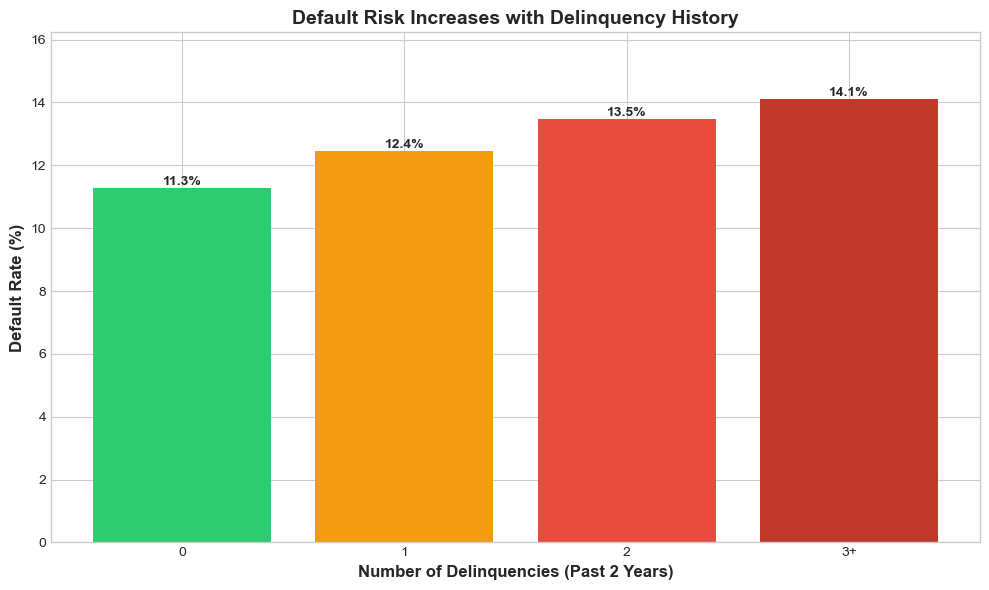

In [122]:
# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

# CHART 1: Default Rate by Delinquency Count
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data (group 3+ together for clarity)
df['delinq_grouped'] = df['delinq_2yrs'].apply(lambda x: '3+' if x >= 3 else str(int(x)))

default_by_delinq = df.groupby('delinq_grouped')['default'].mean() * 100
default_by_delinq = default_by_delinq.reindex(['0', '1', '2', '3+'])

bars = ax.bar(default_by_delinq.index, default_by_delinq.values, color=['#2ecc71', '#f39c12', '#e74c3c', '#c0392b'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Number of Delinquencies (Past 2 Years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Default Risk Increases with Delinquency History', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(default_by_delinq.values) * 1.15)

plt.tight_layout()
plt.savefig('chart1_default_risk_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

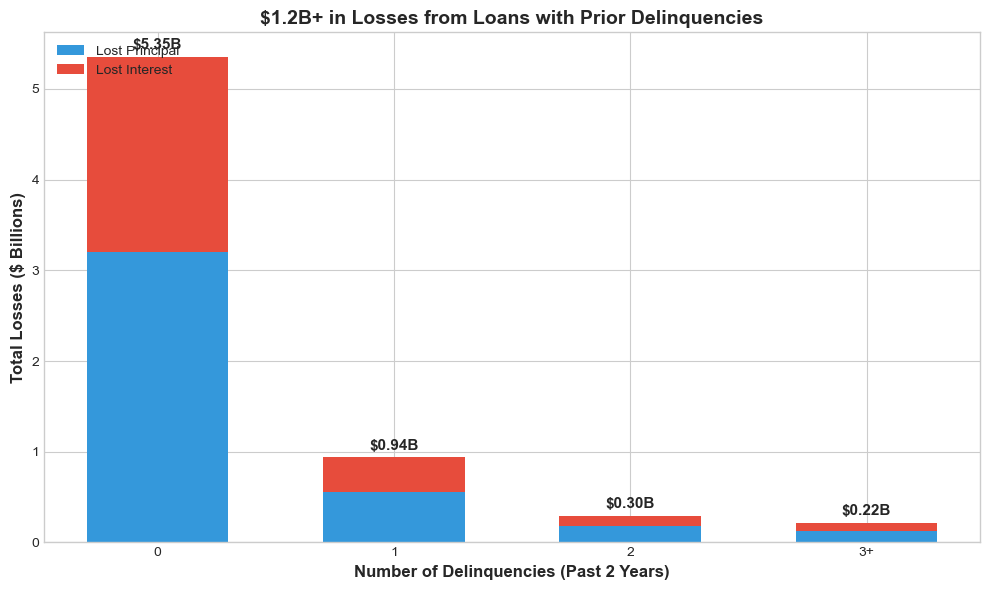

In [126]:
# CHART 2: Total Losses by Delinquency Group
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate losses by group
loss_data = []
for delinq in ['0', '1', '2', '3+']:
    if delinq == '3+':
        subset = df[(df['delinq_2yrs'] >= 3) & (df['default'] == 1)]
    else:
        subset = df[(df['delinq_2yrs'] == int(delinq)) & (df['default'] == 1)]
    
    principal = subset['loan_amnt'].sum() / 1e9  # Convert to billions
    interest = subset['total_interest'].sum() / 1e9
    
    loss_data.append({
        'Delinquencies': delinq,
        'Principal': principal,
        'Interest': interest
    })

loss_df = pd.DataFrame(loss_data)

# Stacked bar chart
x = range(len(loss_df))
width = 0.6

p1 = ax.bar(x, loss_df['Principal'], width, label='Lost Principal', color='#3498db')
p2 = ax.bar(x, loss_df['Interest'], width, bottom=loss_df['Principal'], label='Lost Interest', color='#e74c3c')

# Add total labels
for i, (idx, row) in enumerate(loss_df.iterrows()):
    total = row['Principal'] + row['Interest']
    ax.text(i, total + 0.05, f'${total:.2f}B',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Number of Delinquencies (Past 2 Years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Losses ($ Billions)', fontsize=12, fontweight='bold')
ax.set_title('$1.2B+ in Losses from Loans with Prior Delinquencies', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(loss_df['Delinquencies'])
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig('chart2_business_impact.png', dpi=300, bbox_inches='tight')
plt.show()

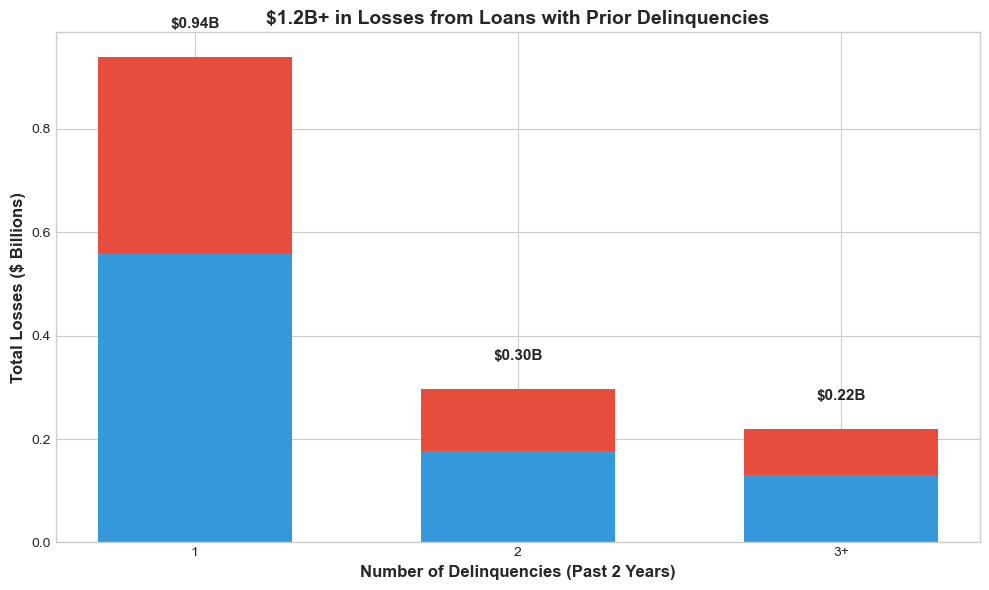

In [130]:
# CHART 2: Total Losses by Delinquency Group (Modified for presentation)
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate losses by group - EXCLUDING 0 delinquencies
loss_data = []
for delinq in ['1', '2', '3+']:  # Removed '0' from the list
    if delinq == '3+':
        subset = df[(df['delinq_2yrs'] >= 3) & (df['default'] == 1)]
    else:
        subset = df[(df['delinq_2yrs'] == int(delinq)) & (df['default'] == 1)]
    
    principal = subset['loan_amnt'].sum() / 1e9  # Convert to billions
    interest = subset['total_interest'].sum() / 1e9
    
    loss_data.append({
        'Delinquencies': delinq,
        'Principal': principal,
        'Interest': interest
    })

loss_df = pd.DataFrame(loss_data)

# Stacked bar chart
x = range(len(loss_df))
width = 0.6

p1 = ax.bar(x, loss_df['Principal'], width, color='#3498db')  # Removed label
p2 = ax.bar(x, loss_df['Interest'], width, bottom=loss_df['Principal'], color='#e74c3c')  # Removed label

# Add total labels
for i, (idx, row) in enumerate(loss_df.iterrows()):
    total = row['Principal'] + row['Interest']
    ax.text(i, total + 0.05, f'${total:.2f}B',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Number of Delinquencies (Past 2 Years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Losses ($ Billions)', fontsize=12, fontweight='bold')
ax.set_title('$1.2B+ in Losses from Loans with Prior Delinquencies', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(loss_df['Delinquencies'])
# LEGEND REMOVED - ax.legend() line deleted

plt.tight_layout()
plt.savefig('chart2_business_impact_focused.png', dpi=300, bbox_inches='tight')
plt.show()

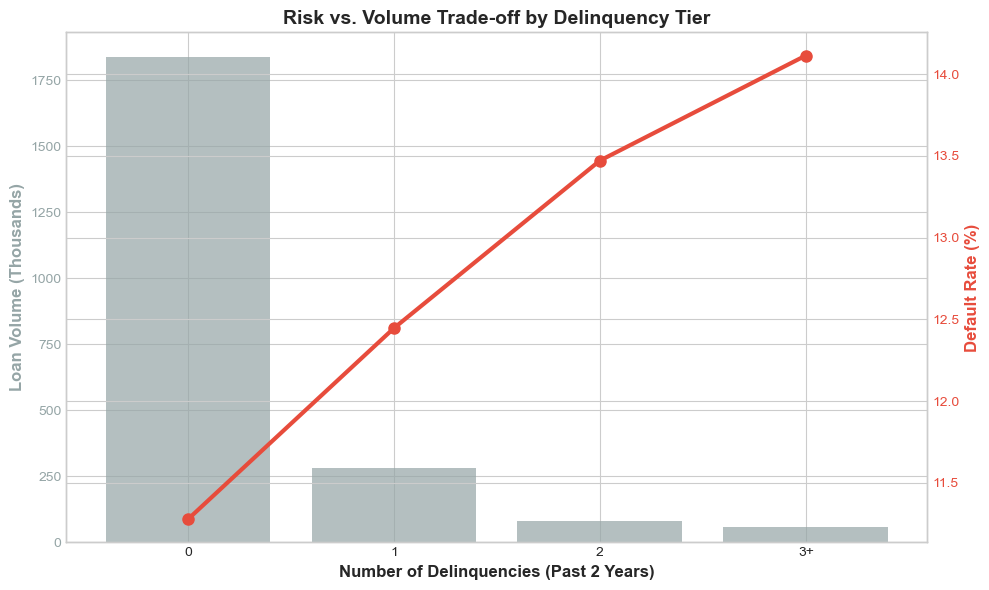

In [128]:
# CHART 3: Volume vs Risk Trade-off
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data
tradeoff_data = []
for delinq in ['0', '1', '2', '3+']:
    if delinq == '3+':
        subset = df[df['delinq_2yrs'] >= 3]
    else:
        subset = df[df['delinq_2yrs'] == int(delinq)]
    
    volume = len(subset) / 1000  # In thousands
    default_rate = subset['default'].mean() * 100
    
    tradeoff_data.append({
        'Delinquencies': delinq,
        'Volume (000s)': volume,
        'Default Rate': default_rate
    })

tradeoff_df = pd.DataFrame(tradeoff_data)

# Dual axis chart
ax2 = ax.twinx()

bars = ax.bar(tradeoff_df.index, tradeoff_df['Volume (000s)'], color='#95a5a6', alpha=0.7, label='Loan Volume')
line = ax2.plot(tradeoff_df.index, tradeoff_df['Default Rate'], color='#e74c3c', marker='o', linewidth=3, markersize=8, label='Default Rate')

ax.set_xlabel('Number of Delinquencies (Past 2 Years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Loan Volume (Thousands)', fontsize=12, fontweight='bold', color='#95a5a6')
ax2.set_ylabel('Default Rate (%)', fontsize=12, fontweight='bold', color='#e74c3c')
ax.set_title('Risk vs. Volume Trade-off by Delinquency Tier', fontsize=14, fontweight='bold')
ax.set_xticks(tradeoff_df.index)
ax.set_xticklabels(tradeoff_df['Delinquencies'])

# Color the axis labels
ax.tick_params(axis='y', labelcolor='#95a5a6')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.tight_layout()
plt.savefig('chart3_risk_volume_tradeoff.png', dpi=300, bbox_inches='tight')
plt.show()